# K-Means
This notebook applies K-Means clustering to the two datasets contained in `../final/`. All of them contains information about the GDP and the CO2 emissions for each country, however, they are divided as:
- Every country (with time series) 
- Top-40 wealthies countries (year 2024)

## Step 0: Import and Read Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.max_columns', 100)

In [2]:
df_all = pd.read_csv('../data/final/gdp_co2_emissions.csv')
df_top40 = pd.read_csv('../data/final/gdp_co2_emissions_top40_2024.csv')

In [3]:
df_all.head()

,Country Name,Country Code,Year,Total CO2 emissions,CO2 emissions per capita,GDP,GDP per capita,GDP growth (annual %)
0,Afghanistan,AFG,2000,1047127.94,0.052017,6.206548e+09,1617.826475,NaN
1,Afghanistan,AFG,2001,1069098.00,0.052706,5.621148e+09,1454.110782,-9.431974
2,Afghanistan,AFG,2002,1341065.00,0.062731,7.228796e+09,1774.308743,28.600001
3,Afghanistan,AFG,2003,1559679.00,0.068608,7.867263e+09,1815.928200,8.832278
4,Afghanistan,AFG,2004,1237247.00,0.052513,7.978516e+09,1776.918207,1.414118


In [5]:
df_top40.head()

,Country Name,Country Code,Year,Total CO2 emissions,CO2 emissions per capita,GDP,GDP per capita,GDP growth (annual %),Continent
0,United States,USA,2024,4.904120e+09,14.197287,2.256846e+13,75489.266433,2.793001,North America
1,China,CHN,2024,1.228904e+10,8.658390,1.848811e+13,23845.619722,4.977357,Asia
2,Japan,JPN,2024,9.618673e+08,7.772474,4.606003e+12,46106.922923,0.104309,Asia
3,Germany,DEU,2024,5.723192e+08,6.768824,3.677049e+12,62554.554723,-0.495852,Europe
4,India,IND,2024,3.193478e+09,2.200978,3.477821e+12,9818.042707,6.494766,Asia


All read correctly

 ---
## 1. Apply K-Means

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

### 1.1 All countries (2024)

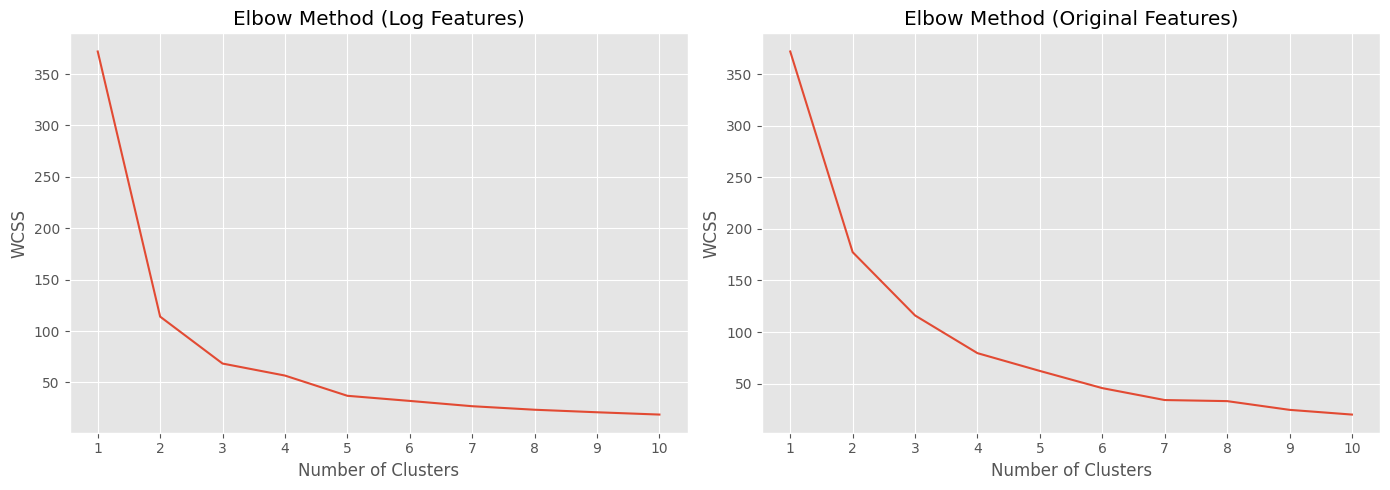

In [5]:
df_clust = df_all[(df_all['GDP per capita'] > 0) & (df_all['CO2 emissions per capita'] > 0)].copy()
df_clust = df_clust[df_clust['Year'] == 2024]

df_clust['log_GDP_pc'] = np.log10(df_clust['GDP per capita'])
df_clust['log_CO2_pc'] = np.log10(df_clust['CO2 emissions per capita'])

# features for clustering
features_log = ['log_GDP_pc', 'log_CO2_pc']
features = ['GDP per capita', 'CO2 emissions per capita']

X_log = df_clust[features_log]
X = df_clust[features]

scaler = StandardScaler()
X_log_scaled = scaler.fit_transform(X_log)
X_scaled = scaler.fit_transform(X)

wcss_log = []
wcss = []
for i in range(1, 11):
    kmeans_log = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_log.fit(X_log_scaled)
    wcss_log.append(kmeans_log.inertia_)

    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(range(1, 11), wcss_log)
axes[0].set_title('Elbow Method (Log Features)')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('WCSS')
axes[0].set_xticks(range(1, 11))

axes[1].plot(range(1, 11), wcss)
axes[1].set_title('Elbow Method (Original Features)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('WCSS')
axes[1].set_xticks(range(1, 11))

plt.tight_layout()
plt.savefig('../outputs/plots/kmeans_elbow_all.png', dpi=300, bbox_inches='tight')
plt.show()

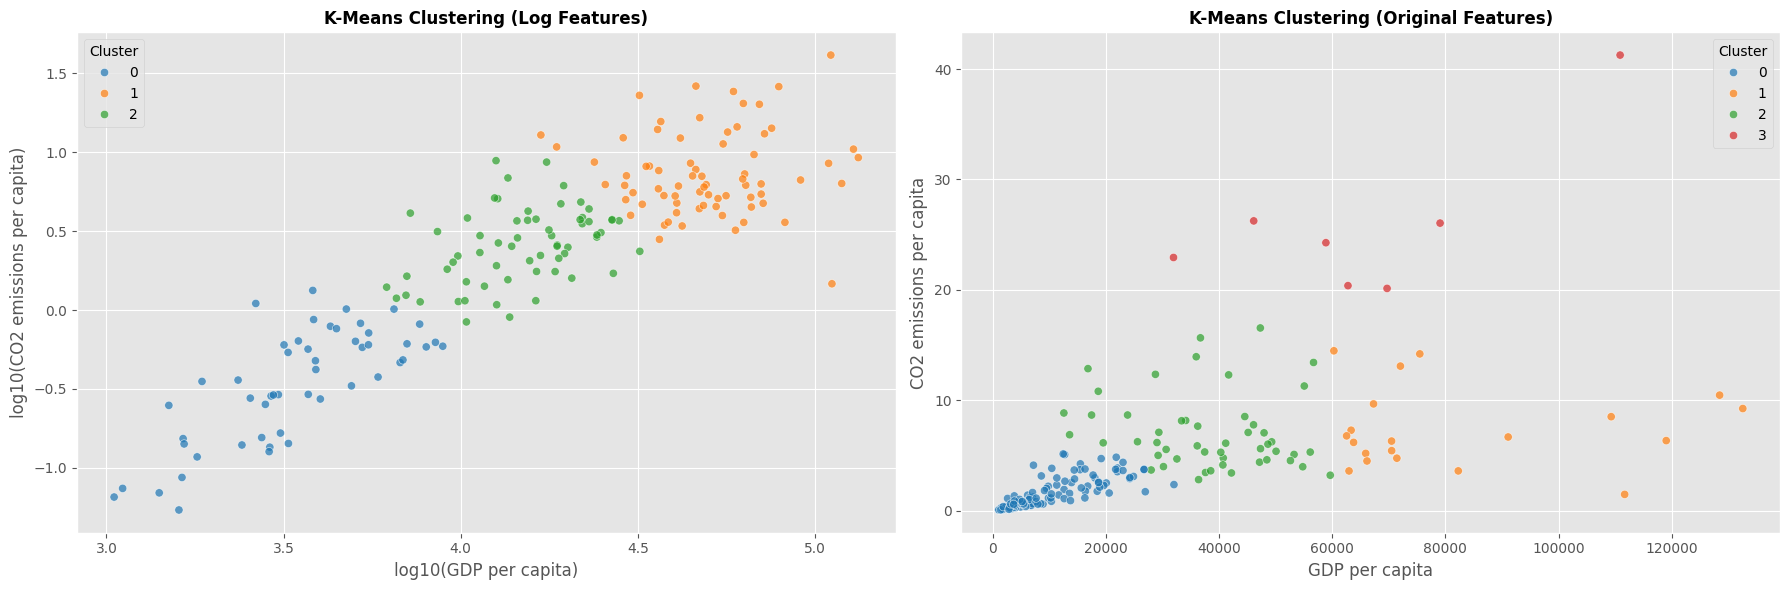

In [ ]:
# K-Means clustering with K=4 clusters
kmeans_log = KMeans(n_clusters=3, init='k-means++', random_state=42)
df_clust['Cluster_log'] = kmeans_log.fit_predict(X_log_scaled)

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
df_clust['Cluster'] = kmeans.fit_predict(X_scaled)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Subplot 1: Log features
sns.scatterplot( data=df_clust, x='log_GDP_pc', y='log_CO2_pc', hue='Cluster_log',
    palette='tab10', alpha=0.7, ax=axes[0])

axes[0].set_title('K-Means Clustering (Log Features)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('log10(GDP per capita)')
axes[0].set_ylabel('log10(CO2 emissions per capita)')
axes[0].legend(title='Cluster')

# Subplot 2: Original features
sns.scatterplot( data=df_clust, x='GDP per capita', y='CO2 emissions per capita', hue='Cluster',
    palette='tab10', alpha=0.7, ax=axes[1])
    
axes[1].set_title('K-Means Clustering (Original Features)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('GDP per capita')
axes[1].set_ylabel('CO2 emissions per capita')
axes[1].legend(title='Cluster')

plt.tight_layout()
plt.savefig('../outputs/plots/kmeans_all.png', dpi=300, bbox_inches='tight')
plt.show()